# Error Analysis

## Carrying Out Error Analysis
- Look at Dev Examples to Evaluate Ideas
    - Should you try to make your cat classifier do better on dogs?
    - Assume that your cat classifier has 90% accuracy, i.e. 10% error, on the dev set.
    - Error analysis
        - Get ~100 misclassified dev set examples by the cat classifier
        - Assume that you found 5 of them are actually dog examples
            - This means that even if you can fix the dog classification problem, you'll still misclassify 95 cat examples left, which slightly lower your dev set error from 10% to 9.5%.
            - This is called the **ceiling** of performance.
        - Assuming that you instead have 50 of misclassified dev examples being dogs.
            - In this case, working on dog problems could potentially allow you to lower dev set error from 10% to 5%.
            - You can be more optimistic about spending time working on the dog classification problem.
- We can also evaluate multiple ideas in parallel by mannually going through a set of misclassified dev examples w.r.t these ideas.
    - The output can give you a good sense about which direction should you work on to improve the dev set accuracy, and potentially by how much.

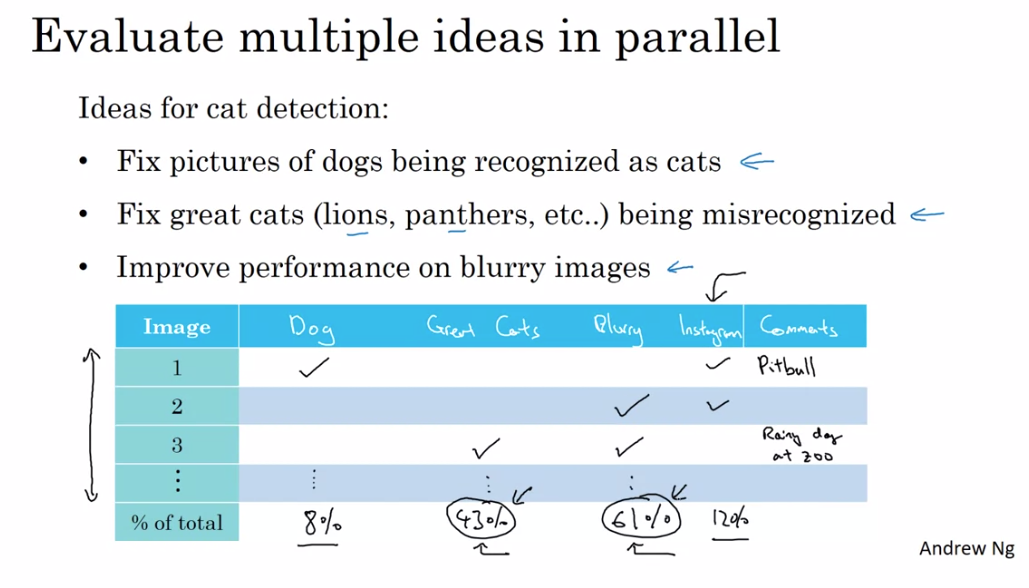

## Cleaning Up (Originally) Incorrectly Labeled Data
- Here, we are talking out mistakes in the dataset itself, not examples misclassified by your model.
- Training Set
    - DL algorithms are quite robust to random errors in the training set.
    - This is considered systematic errors.
- Dev/Test Set
    - Do Error Analysis and add another column to record whether the data itself is mislabeled.
    - If a big proportion of your misclassified dev/test examples are actually mislabeled itself, it actually means that your model is doing well but the data is wrong.
        - In this case, you should spend sometime going through your data and correct these mislabels.
        
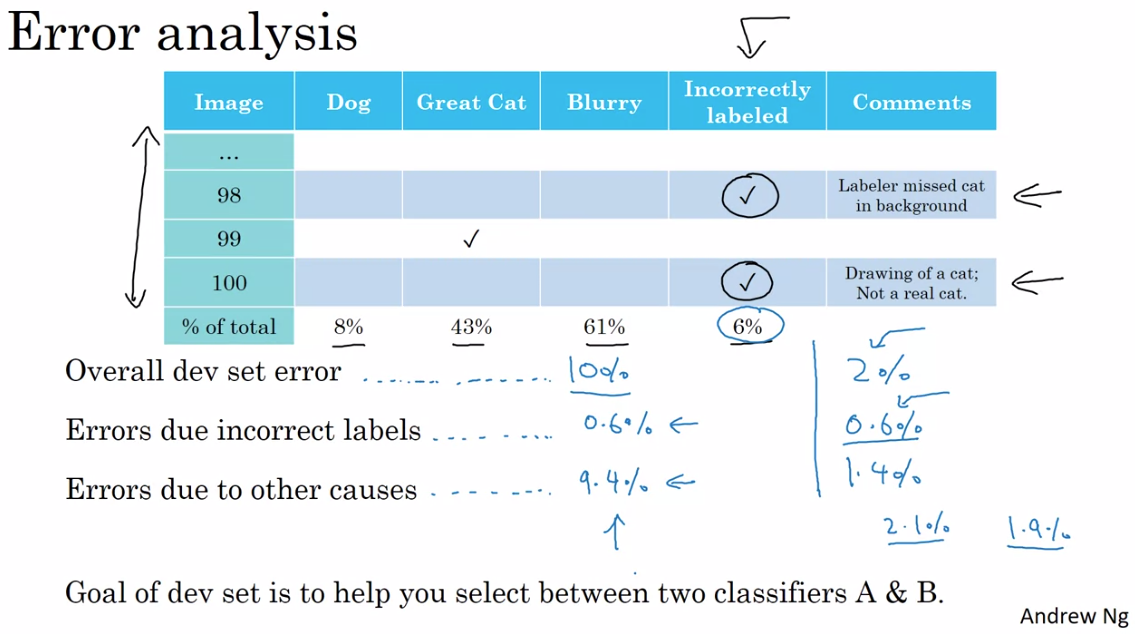

- Correcting Incorrect Dev/Test Set Examples
    - Apply the same process to dev and test sets to ensure that they continue to come from the same distribution.
    - Consider examing examples your algorithm got right as well as ones it got wrong.
        - If your algorithm agreed with mislabeled examples, it's actually wrong.
    - Train and dev/test may now come from slightly different distributions.

## Build Your First System Quickly, Then Iterate
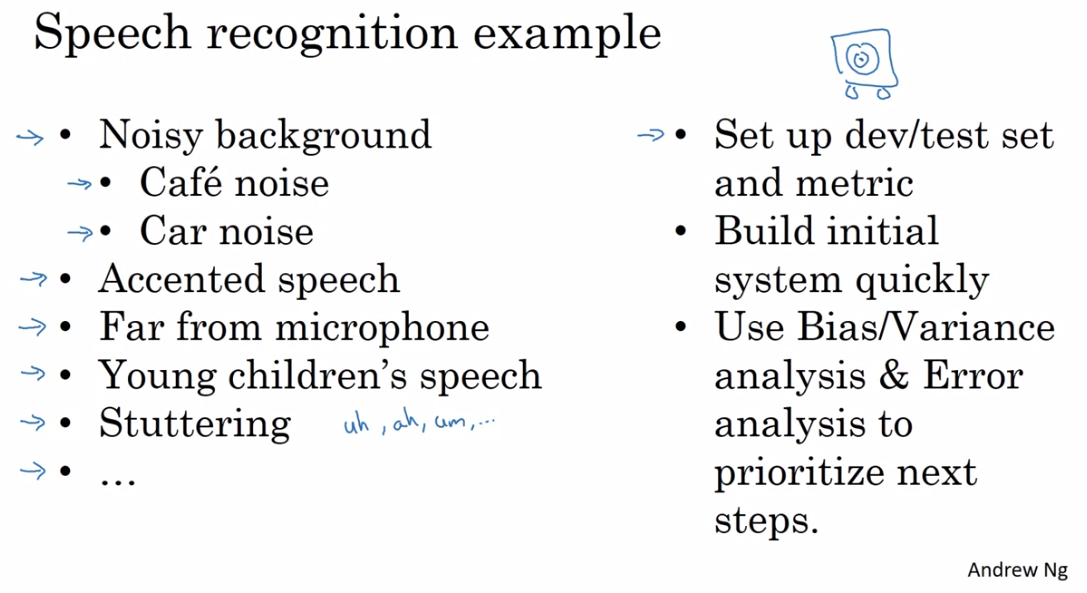

# Mismatched Training and Dev/Test Set

## Training and Testing on Different Distributions
- For many times, we would have to include more data to train our model, even if these data do not come from the same distribution as the dev/test set.
- Guidelines for handling mismatched training and dev/test set
    - Option 1: 
        - Mix all the data together, reshuffle, and re-split train/dev/test set.
            - Advantage: train and dev/test set match in distribution.
            - Disadvantage: dev/test set after mixing may no longer represent the target distribution.
    - Option 2 (recommended):
        - Mix the new data in training set only and keep dev/test set consistent with the target distribution.
            - Advantage: Dev/test set represents target.
            - Disadvantage: This method causes mismatch between trainning and dev/test set.
            
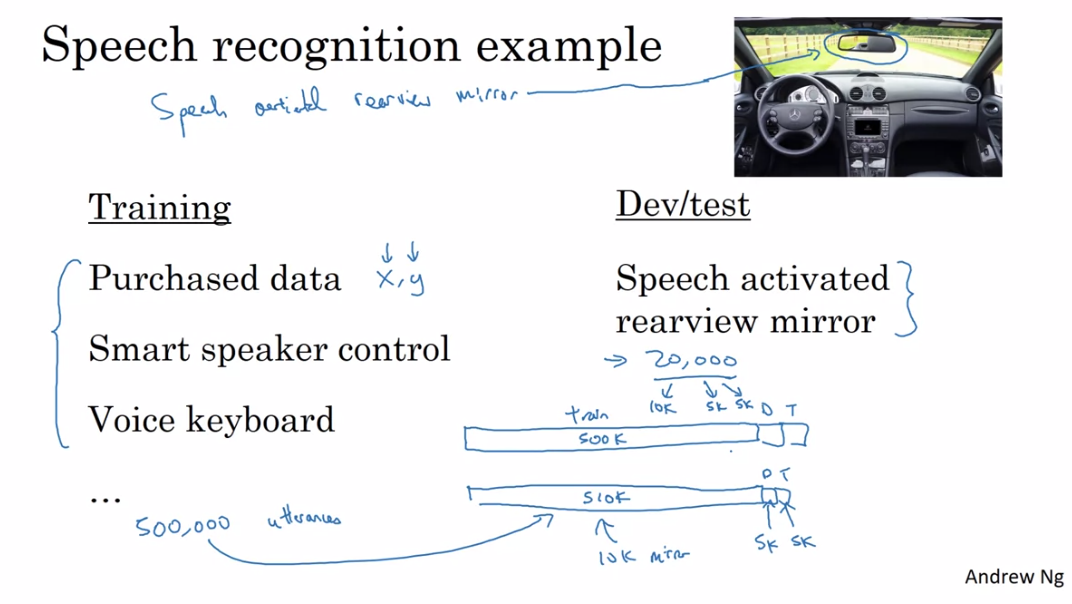

## Bias and Variance with Mismatched Data Distributions
- Methods for estimating bias and variance change when training and dev/test sets come from different distributions.
    - In this case, even if the dev error is much higher than training error, it doesn't necessarily mean variance is high, as the training and dev set come from different distributions.
- To better identify variance, we need to define a **training-dev set**, which come from the same distribution as the training set but is not used for training.
    - Now for error analysis, we use the training-dev set instead of dev set to identify variance.
    - The jumping from training-dev set error and dev set error is from the data mismatch problem.
    
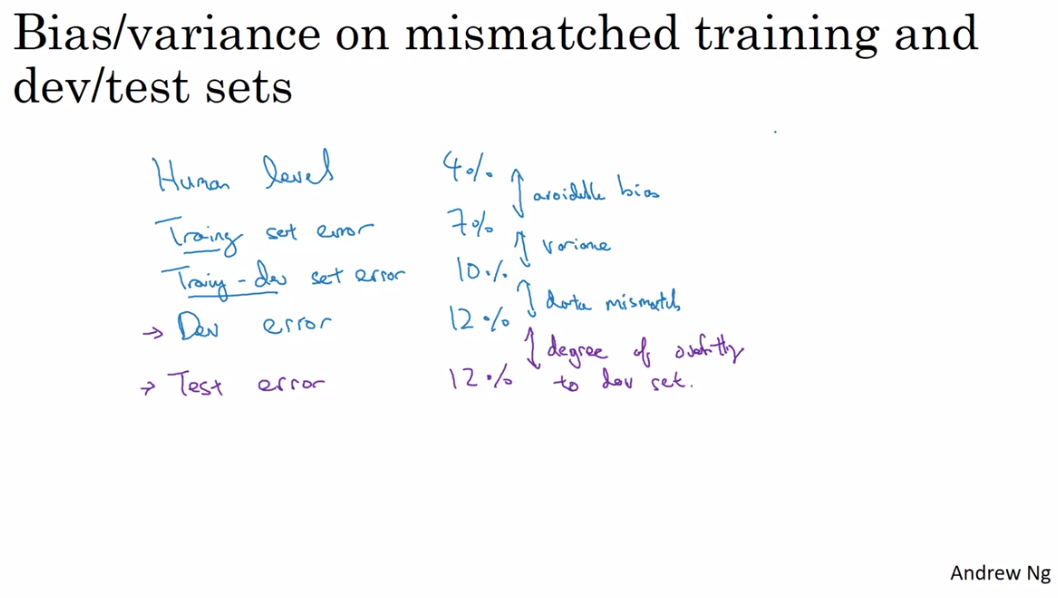

- A More General Formulation
    - Assume we want to training a speech recognition algorithm on reaview mirror.
    - We also have data coming from a different general speech recognition source.

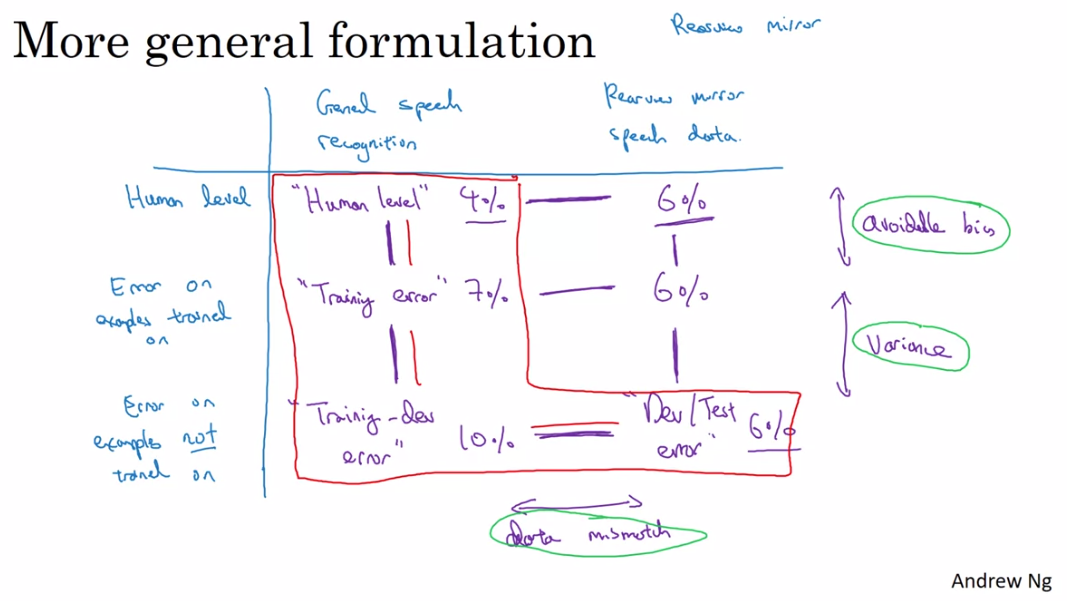

## Adressing Data Mismatch
- If the training set come from a different distribution than dev/test set, we now have three sources of error: **bias**, **variance**, and **data mismatch**.
- Unfortunately, there is no systematic way to address the issue. 
- But here are some general guidelines:
    - Carry out manual error analysis to try to understand difference between training and dev/test sets
    - Making training data more similar or collect more data similar to dev/test sets
        - **Artificial data synthesis**
            - Note: your algorithm may overfit your synthesized data if you used the same set of data repeatedly in artificial data synthesis, making your synthesized data a very small set of all possible data.
            
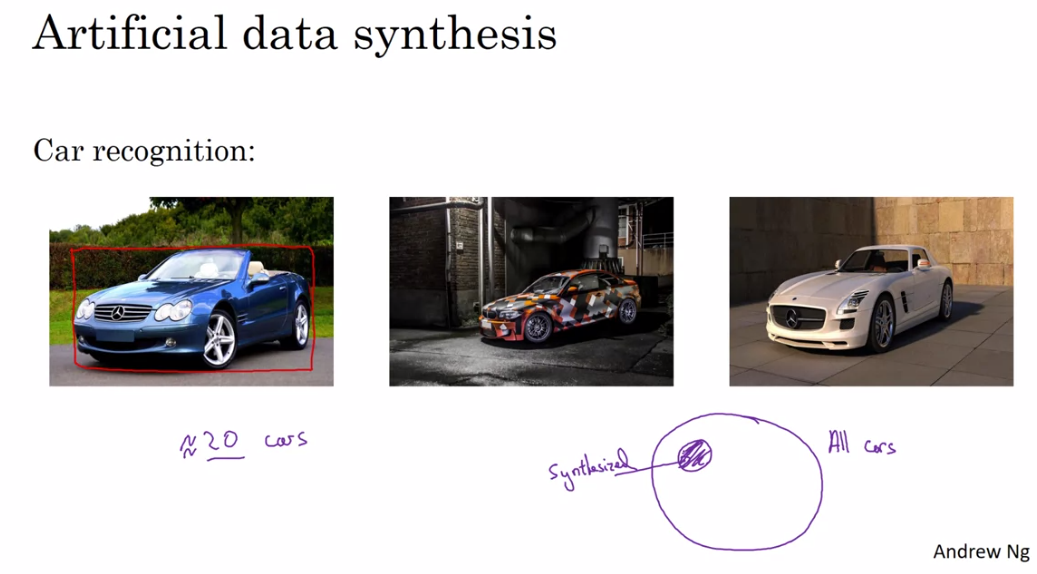

# Learning from Multiple Tasks

## Transfer Learning
- Transfer learning is the process of using deep neural networks previously trained for a different new task.
- Steps:
    1. Randomly re-initialize parameters on the last layer of the NN, i.e. $W^{[L]}, b^{[L]}$.
    2. Retrain the NN
        - If you only have a small data set $(X_{new}, y_{new})$ for the new task, you can only retrain the last layer $W^{[L]}, b^{[L]}$. 
        - If you have a large data set $(X_{new}, y_{new})$ for the new task, you can retrain all layers $\{ W^{[l]}, b^{[l]} \}, l=1, ..., L$. 
            - In this case, training the NN on the previous task is called **pre-training**, and re-train the NN on the new dataset is called **fine-tuning**.

- When Does Transfer Learning (from Task A to Task B) Make Sense?
    - Task A and B have the same input $X$.
    - You have a lot more data for Task A than Task B, assuming your goal is to do well on Task B.
        - When it's the opposite, transfer learning may not help as much, since data for Task B is more valuable for learning B than data for Task A, and you've already have more of them.
    - Low level features from A could be helpful for learning B.
    
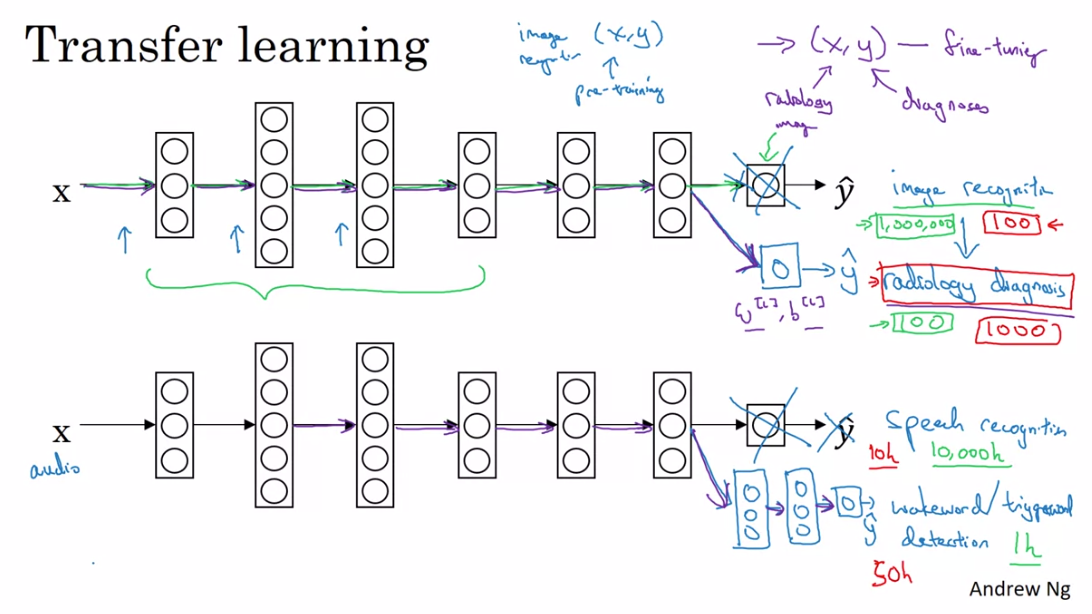

## Multi-Task Learning
- For multi-task learning, we train the NN for multiple tasks at the same time, hoping that learning on each task will help learning the others.
- Simplified Automous Driving Example
    - We can train the NN on learning to identify pedestrians, cars, stop signs, and traffic lights simultaneously.
    - The output of this NN is $\hat y \in R^{4}$.
        - Note that this output is different from softmax function.
        - Here, a single prediction $\hat y$ can have more than 1 label, while in softmax classification there is only one label in each prediction.
    - Note that this algorithm also allows unlabeled predictions. But the loss function will only consider predictions properly labeled.
        
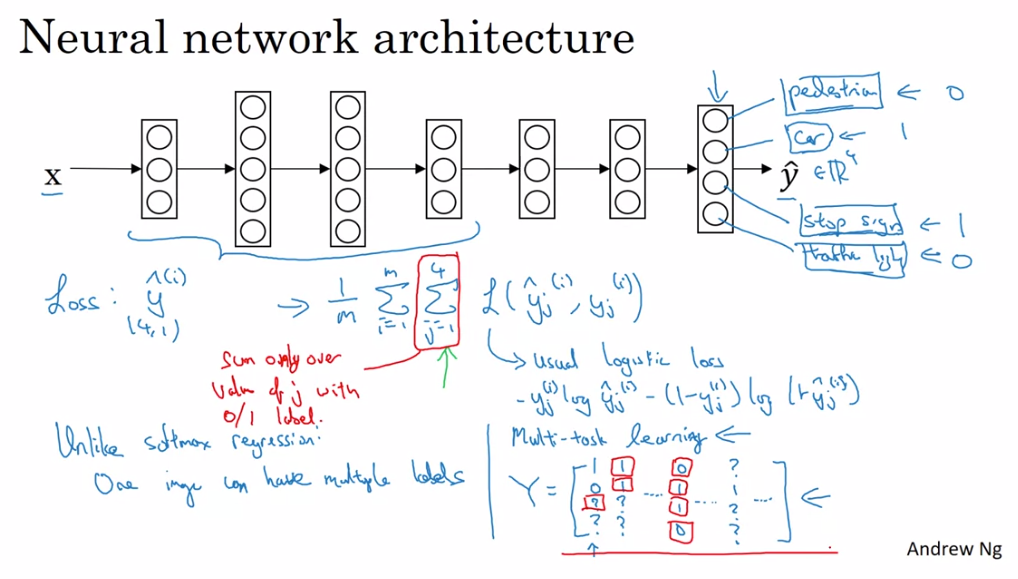

- When Does Multi-Task Learning Make Sense?
    - Training on a set of tasks that could benefit from having shared lower-level features.
    - Usually: Amount of data for each task is quite similar.
    - You can train a big enough neural network to do well on all tasks.
        - Otherwise, you should train separate NN for each task.

# End-to-End Deep Learning

## What is End-to-End Deep Learning
- End-to-end deep learning replaces multiple stages in data processing and learning with a single complicated neural network.

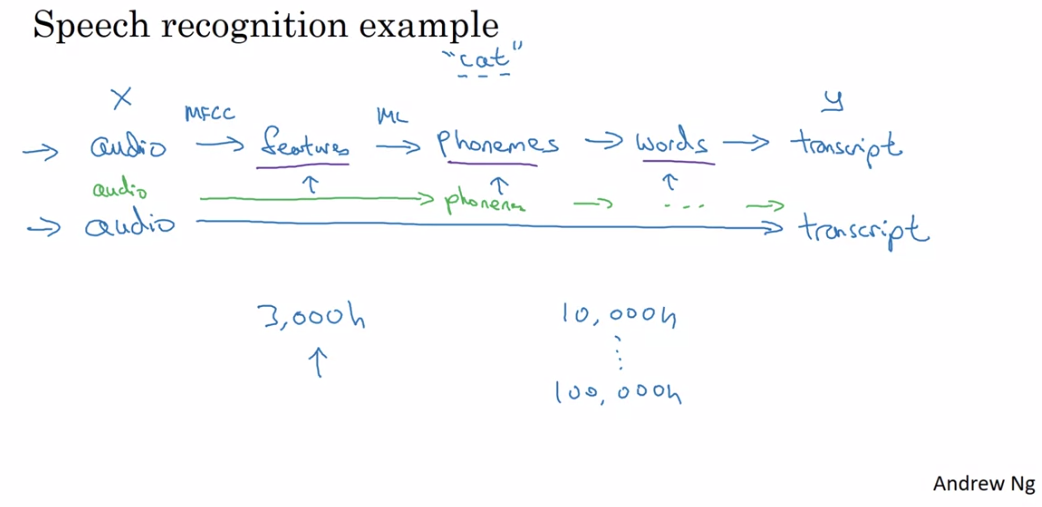

## When to Use End-to-End Deep Learning
- Pros
    - Let the data speak
    - Less hand-designing of components needed
- Cons
    - May need large amount of data
    - Excludes potentially useful hand-designed components
- Applying End-to-End Deep Learning
    - Key question: Do you have sufficient data to learn a function of the complexity needed to map $X$ directly to $y$?